In [108]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats


fileName = os.path.join('./bikeshare.csv')
data = pd.read_csv(fileName,index_col='datetime',parse_dates=True)
data.rename(columns={'count':'total'}, inplace=True)
data.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


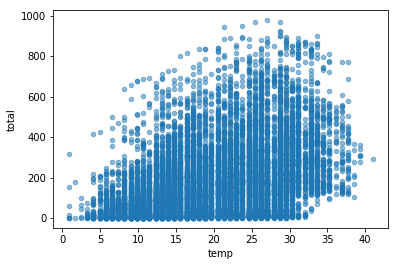

In [59]:
data.plot(kind='scatter',x='temp',y='total',alpha=0.5)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression

In [105]:
feature_cols = ['weather','temp','humidity']
x = data[feature_cols]
y = data.total
linereg = LinearRegression()
linereg.fit(x,y)

print linereg.intercept_
print linereg.coef_


183.23969390859912
[ 3.77938867  8.73698147 -2.80809402]


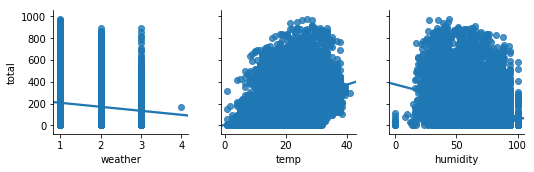

In [63]:
sb.pairplot(data,x_vars=feature_cols,y_vars='total',kind='reg')
plt.show()

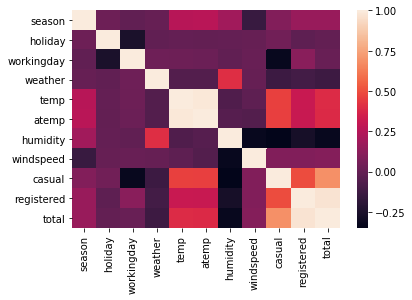

In [68]:
sb.heatmap(data.corr(), linecolor='blue')

In [86]:
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [118]:
#os.path.join('/glass.csv')

glass = pd.read_csv('glass.csv', names=col_names, index_col='id')
glass.head


<bound method DataFrame.head of           ri     na    mg    al     si     k    ca    ba    fe  glass_type
id                                                                        
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00           1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00           1
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00           1
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00           1
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00           1
6    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26           1
7    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.00  0.00           1
8    1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.00  0.00           1
9    1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.00  0.00           1
10   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11           1
11   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24      

## Step1: find out how many glass types and how many samples for each glass type

In [110]:
for i in glass.glass_type.unique():
    print "There are %s samples of glass type %s " % (len(glass.loc[glass['glass_type']== i ,'al']),i)
print "There are %s unique glass types" %  len(glass.glass_type.unique())

There are 70 samples of glass type 1 
There are 76 samples of glass type 2 
There are 17 samples of glass type 3 
There are 13 samples of glass type 5 
There are 9 samples of glass type 6 
There are 29 samples of glass type 7 
There are 6 unique glass types


## Step2: find out the correlation between 'al' and 'ri'

In [122]:
print "The quantitative correlation between Al and Ri is %s " % np.corrcoef(glass.al,glass.ri)[0][1]

The quantitative correlation between Al and Ri is -0.4073260340813921 


array([[ 1.        , -0.40732603],
       [-0.40732603,  1.        ]])

## Step3: make predictions of 'ri' based on 'al'

In [117]:
info = stats.linregress(glass.al,glass.ri)
slope = info[0]
intercept = info[1]
print "The linear regression of Al compared to Ri is: mx+b"
print "x = the value of Al,"
print "m = %s," % slope
print "b = %s" % intercept

The linear regression of Al compared to Ri is: mx+b
x = the value of Al,
m = -0.0024776063874696265,
b = 1.5219453302386425


## Step4: create a new coulmn of the predicted 'ri' values to the dataframe

In [128]:
glass['predictedRi'] = glass.al*slope + intercept

## Step5: glass types 1, 2, 3 are window glass, glass types 5, 6, 7 are household glass, create a
## new column called 'household' that distinguishes household glass from window glass
## (window glass =0, household glass = 1)
## hint: try glass.glass_type.map

In [130]:

glass['household'] = glass.glass_type.map({1:0,2:0,3:0,5:1,6:1,7:1})

## Step6: make a scatter plot of 'al' and 'household'. Are they correlated? What is the linear
## regression fit?

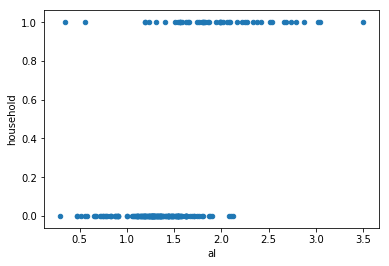

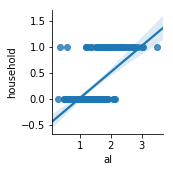

In [132]:
glass.plot(kind='scatter',x='al',y='household')
sb.pairplot(glass,x_vars="al",y_vars='household',kind='reg')
plt.show()

## Step7: make prediction of household type based on 'al' and add that to a new column called
## 'household_pred'

In [156]:
info1 = stats.linregress(glass.al,glass.household)
slopeAl = info1[0]
interceptAl = info1[1]
glass['household_predict_class'] = np.round_(glass.al*slopeAl + interceptAl)

## Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logReg = LogisticRegression()
feature_column = ['al']
xlog = glass[feature_column]
ylog = glass.household
logReg.fit(xlog,ylog)
glass['household_log_class'] = logReg.predict(xlog)

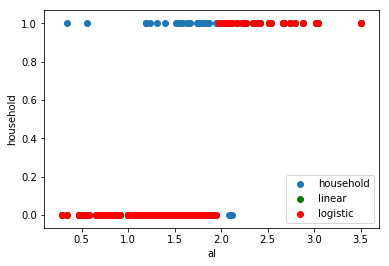

In [166]:
plt.scatter(glass.al,glass.household)
plt.scatter(glass.al,glass.household_predict_class,color='green',label='linear')
plt.scatter(glass.al,glass.household_predict_class,color='red',label='logistic')
plt.xlabel('al')
plt.ylabel('household')
plt.legend()
plt.show()

In [168]:
glass['household_pred_prob'] = logReg.predict_proba(xlog)[:,1]

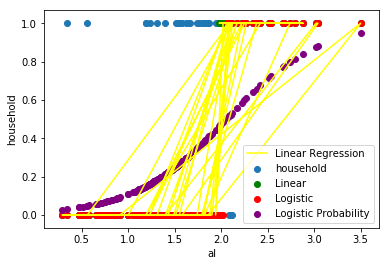

In [186]:
plt.scatter(glass.al,glass.household)
plt.plot(glass.al,glass.household_pred,color='yellow',label='Linear Regression')
plt.scatter(glass.al,glass.household_predict_class,color='green',label='Linear')
plt.scatter(glass.al,glass.household_log_class,color='red',label='Logistic')
plt.scatter(glass.al,glass.household_pred_prob,color='purple',label='Logistic Probability')
plt.xlabel('al')
plt.ylabel('household')
plt.legend()
plt.show()
